In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from gensim.models import FastText
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
df = pd.read_excel("D:/FCDS/A.courses/Semester 5/Data Science Tools/Dataset.xlsx")
df

,Source.Name,Song,Song year,Artist,Genre,Lyrics,Track_id,Language
0,test.csv,craftsmanship,2005.0,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294.0,NaN
1,test.csv,come-on-out,2012.0,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621.0,NaN
2,test.csv,riot,2013.0,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301.0,NaN
3,test.csv,that-s-what-girls-do,2007.0,dream-street,Pop,You ask me why I change the color of my hair\n...,2773.0,NaN
4,test.csv,believe-in-a-dollar,2012.0,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797.0,NaN
...,...,...,...,...,...,...,...,...
298113,train.csv,i wish he didn t trust me so much,NaN,bobby womack,R&B,I'm the best friend he's got I'd give him the ...,NaN,en
298114,train.csv,i totally miss you,NaN,bad boys blue,Pop,"Bad Boys Blue ""I Totally Miss You"" I did you w...",NaN,en
298115,train.csv,sorry for love,NaN,celine dion,Pop,Forgive me for the things That I never said to...,NaN,en
298116,train.csv,cure for aids,NaN,dan bern,Indie,The day they found a cure for AIDS The day the...,NaN,en


## Clean & Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298118 entries, 0 to 298117
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Source.Name  298118 non-null  object 
 1   Song         298117 non-null  object 
 2   Song year    7935 non-null    float64
 3   Artist       298118 non-null  object 
 4   Genre        298118 non-null  object 
 5   Lyrics       298083 non-null  object 
 6   Track_id     7935 non-null    float64
 7   Language     290179 non-null  object 
dtypes: float64(2), object(6)
memory usage: 18.2+ MB


In [5]:
df=df.drop(columns=['Song year','Track_id','Source.Name'])
df

,Song,Artist,Genre,Lyrics,Language
0,craftsmanship,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,NaN
1,come-on-out,the-elwins,Indie,Take your cold hands and put them on my face\n...,NaN
2,riot,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,NaN
3,that-s-what-girls-do,dream-street,Pop,You ask me why I change the color of my hair\n...,NaN
4,believe-in-a-dollar,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,NaN
...,...,...,...,...,...
298113,i wish he didn t trust me so much,bobby womack,R&B,I'm the best friend he's got I'd give him the ...,en
298114,i totally miss you,bad boys blue,Pop,"Bad Boys Blue ""I Totally Miss You"" I did you w...",en
298115,sorry for love,celine dion,Pop,Forgive me for the things That I never said to...,en
298116,cure for aids,dan bern,Indie,The day they found a cure for AIDS The day the...,en


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298118 entries, 0 to 298117
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Song      298117 non-null  object
 1   Artist    298118 non-null  object
 2   Genre     298118 non-null  object
 3   Lyrics    298083 non-null  object
 4   Language  290179 non-null  object
dtypes: object(5)
memory usage: 11.4+ MB


In [7]:
df['Language'].value_counts()

en    250197
pt     30102
es      3892
ro      1184
it       808
id       737
fr       644
de       478
sw       304
tl       241
so       229
cy       226
ca       137
tr       116
nl       116
sk        98
hr        97
no        93
sl        77
af        77
da        71
sv        61
et        58
fi        54
pl        24
cs        17
sq        15
hu        10
vi         7
ru         4
lt         2
lv         2
ko         1
Name: Language, dtype: int64

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
conflict_words={'a','an','y','d','ve','t','s','re','o','to','so','or','no','m','ma','me','ll','i','a','all','an','at','by'}
english_stopwords=conflict_words


def contains_english_lyrics(lyrics):
    if isinstance(lyrics, str):
        words = lyrics.lower().split()
        for word in words:
            if word in english_stopwords:
                return True
    return False

# Apply the logic to fill the language column with 'en' if lyrics contain English stopwords
#df['Language'] = df[df['Language'].isna()]['Lyrics'].apply(lambda lyrics: 'en' if contains_english_lyrics(lyrics) else None)
df.loc[df['Language'].isna(), 'Language'] = df.loc[df['Language'].isna(), 'Lyrics'].apply(
    lambda lyrics: 'en' if contains_english_lyrics(lyrics) else 'non-en')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298118 entries, 0 to 298117
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Song      298117 non-null  object
 1   Artist    298118 non-null  object
 2   Genre     298118 non-null  object
 3   Lyrics    298083 non-null  object
 4   Language  298118 non-null  object
dtypes: object(5)
memory usage: 11.4+ MB


In [11]:
df['Language'].value_counts()

en        258108
pt         30102
es          3892
ro          1184
it           808
id           737
fr           644
de           478
sw           304
tl           241
so           229
cy           226
ca           137
tr           116
nl           116
sk            98
hr            97
no            93
sl            77
af            77
da            71
sv            61
et            58
fi            54
non-en        28
pl            24
cs            17
sq            15
hu            10
vi             7
ru             4
lt             2
lv             2
ko             1
Name: Language, dtype: int64

In [12]:
df=df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298082 entries, 0 to 298117
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Song      298082 non-null  object
 1   Artist    298082 non-null  object
 2   Genre     298082 non-null  object
 3   Lyrics    298082 non-null  object
 4   Language  298082 non-null  object
dtypes: object(5)
memory usage: 13.6+ MB


In [14]:
dp=df[df.duplicated(keep=False)]
dp.head()

,Song,Artist,Genre,Lyrics,Language
74,merry-go-round,abba,Pop,I have tried in vain never had success\nSo it ...,en
7935,world so cold,12 stones,Rock,"It starts with pain, followed by hate\nFueled ...",en
7936,broken,12 stones,Rock,Freedom!\nAlone again again alone\nPatiently w...,en
7937,3 leaf loser,12 stones,Rock,"Biting the hand that feeds you, lying to the v...",en
7938,anthem for the underdog,12 stones,Rock,You say you know just who I am\nBut you can't ...,en


In [15]:
df=df.drop_duplicates()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269605 entries, 0 to 298117
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Song      269605 non-null  object
 1   Artist    269605 non-null  object
 2   Genre     269605 non-null  object
 3   Lyrics    269605 non-null  object
 4   Language  269605 non-null  object
dtypes: object(5)
memory usage: 12.3+ MB


In [17]:
df['Lyrics'].duplicated().sum()

12448

In [18]:
df=df.drop_duplicates(subset=['Lyrics'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257157 entries, 0 to 298117
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Song      257157 non-null  object
 1   Artist    257157 non-null  object
 2   Genre     257157 non-null  object
 3   Lyrics    257157 non-null  object
 4   Language  257157 non-null  object
dtypes: object(5)
memory usage: 11.8+ MB


<Axes: xlabel='Languages', ylabel='Count'>

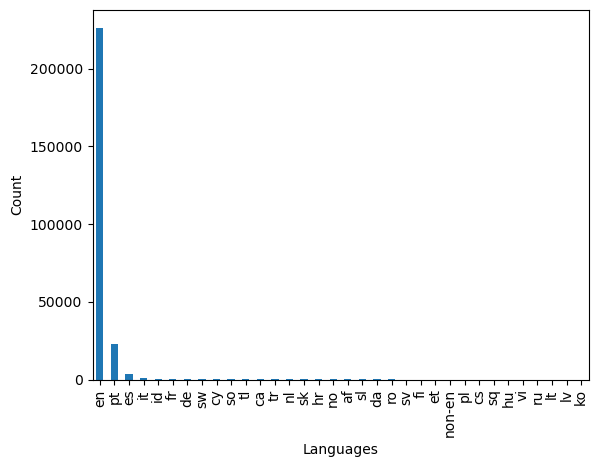

In [20]:
df['Language'].value_counts().plot(kind='bar',xlabel='Languages' ,ylabel='Count')

In [21]:
df=df[df['Language']=='en']

In [22]:
df['Language'].value_counts()

en    226359
Name: Language, dtype: int64

In [23]:
df

,Song,Artist,Genre,Lyrics,Language
0,craftsmanship,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,en
1,come-on-out,the-elwins,Indie,Take your cold hands and put them on my face\n...,en
2,riot,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,en
3,that-s-what-girls-do,dream-street,Pop,You ask me why I change the color of my hair\n...,en
4,believe-in-a-dollar,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,en
...,...,...,...,...,...
298113,i wish he didn t trust me so much,bobby womack,R&B,I'm the best friend he's got I'd give him the ...,en
298114,i totally miss you,bad boys blue,Pop,"Bad Boys Blue ""I Totally Miss You"" I did you w...",en
298115,sorry for love,celine dion,Pop,Forgive me for the things That I never said to...,en
298116,cure for aids,dan bern,Indie,The day they found a cure for AIDS The day the...,en


In [24]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    return " ".join(tokens)

In [25]:
df['cleaned_lyrics'] = df['Lyrics'].apply(clean_text)

In [26]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Genre'])

In [28]:
y

array([3, 4, 6, ..., 7, 4, 7])

## Modeling

### FastText + Logistic Regression

In [29]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['cleaned_lyrics'], df['Genre'], test_size=0.2, random_state=42
)


In [30]:
sentences = [text.split() for text in train_texts]
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=2, epochs=5)

In [31]:
def text_to_vector(text, model):
    tokens = text.split()
    return np.mean([model.wv[word] for word in tokens if word in model.wv] or [np.zeros(100)], axis=0)

In [32]:
X_train = np.vstack([text_to_vector(text, fasttext_model) for text in train_texts])
X_test = np.vstack([text_to_vector(text, fasttext_model) for text in test_texts])

In [55]:
model= LogisticRegression(max_iter=1000)

In [56]:
model.fit(X_train, train_labels)

LogisticRegression(max_iter=1000)

In [57]:
preds = model.predict(X_test)

In [58]:
print(classification_report(test_labels, preds, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

     Country       0.17      0.00      0.00       499
  Electronic       0.00      0.00      0.00       571
        Folk       0.35      0.00      0.01      1649
     Hip-Hop       0.09      0.00      0.00       632
       Indie       0.00      0.00      0.00      1402
        Jazz       0.37      0.05      0.08      1750
       Metal       0.59      0.37      0.46      3725
         Pop       0.56      0.51      0.54     14509
         R&B       0.00      0.00      0.00       678
        Rock       0.54      0.80      0.64     19857

    accuracy                           0.55     45272
   macro avg       0.27      0.17      0.17     45272
weighted avg       0.50      0.55      0.50     45272



In [59]:
acc = accuracy_score(test_labels,preds)
acc

0.547490722742534

### TF - IDF + Logistic Regression

In [60]:
tfidf = TfidfVectorizer(max_features=5000)  
X = tfidf.fit_transform(df['cleaned_lyrics']).toarray()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LogisticRegression(max_iter=1000)

In [63]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [64]:
y_pred = model.predict(X_test)

In [65]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
               precision    recall  f1-score   support

     Country       1.00      0.00      0.00       499
  Electronic       1.00      0.00      0.00       571
        Folk       0.50      0.04      0.07      1649
     Hip-Hop       0.44      0.06      0.10       632
       Indie       0.33      0.00      0.01      1402
        Jazz       0.58      0.17      0.26      1750
       Metal       0.66      0.45      0.54      3725
         Pop       0.60      0.56      0.58     14509
         R&B       0.50      0.00      0.01       678
        Rock       0.57      0.81      0.67     19857

    accuracy                           0.58     45272
   macro avg       0.62      0.21      0.22     45272
weighted avg       0.58      0.58      0.54     45272



In [66]:
acc = accuracy_score(y_test,y_pred)
acc

0.5811760028273547

### TF - IDF + Multinomial Model 

In [30]:
tfidf = TfidfVectorizer(max_features=5000)  
X = tfidf.fit_transform(df['cleaned_lyrics']).toarray()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model=MultinomialNB()

In [75]:
model.fit(X_train,y_train)

MultinomialNB()

In [76]:
y_pred=model.predict(X_test)

In [77]:
print(accuracy_score(y_test,y_pred))

0.548330093656123


### TF - IDF + Gradient Boosting with Grid search

In [29]:
#X = df['cleaned_lyrics']  # Text data
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
#X_train_tfidf = tfidf.fit_transform(X_train)
#X_test_tfidf = tfidf.transform(X_test)

#xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

In [30]:
#param_grid = {
#    'n_estimators': [100 , 150],       
#    'learning_rate': [0.1, 0.2],  
#    'max_depth': [5 , 7],             
#    'subsample': [0.8, 1.0],             
#    'colsample_bytree': [0.8, 1.0],      
#}

#grid_search = GridSearchCV(
#    estimator=xgb_model,
#    param_grid=param_grid,
#    scoring='accuracy',
#    cv=2,  
 #   verbose=2,
#    n_jobs=-1  
#)
#grid_search.fit(X_train_tfidf, y_train)
#print("Best Parameters:", grid_search.best_params_)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


C:\Users\moham\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
32 fits failed out of a total of 64.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moham\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moham\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\moham\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1531, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\moham\an

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}


In [50]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')
X = vectorizer.fit_transform(df['cleaned_lyrics'])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=150,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [58]:
model.fit(X_train, y_train)

C:\Users\moham\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:27:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [59]:
y_pred = model.predict(X_test)

In [68]:
y_pred = label_encoder.inverse_transform(y_pred)
y_test = label_encoder.inverse_transform(y_test)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Country       0.25      0.01      0.02       499
  Electronic       0.00      0.00      0.00       571
        Folk       0.58      0.04      0.07      1649
     Hip-Hop       0.28      0.03      0.06       632
       Indie       0.25      0.00      0.00      1402
        Jazz       0.67      0.13      0.21      1750
       Metal       0.70      0.33      0.45      3725
         Pop       0.67      0.50      0.57     14509
         R&B       0.79      0.03      0.05       678
        Rock       0.55      0.88      0.68     19857

    accuracy                           0.58     45272
   macro avg       0.47      0.19      0.21     45272
weighted avg       0.59      0.58      0.53     45272



In [72]:
print(accuracy_score(y_test,y_pred))

0.5823467043647288


### TF - IDF + Support Vector Machine

In [43]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_lyrics']).toarray()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
svm_model = LinearSVC()

In [46]:
svm_model.fit(X_train, y_train)

LinearSVC()

In [47]:
y_pred = svm_model.predict(X_test)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.00      0.00       499
           1       1.00      0.00      0.00       571
           2       0.44      0.03      0.05      1649
           3       0.56      0.05      0.10       632
           4       0.08      0.00      0.00      1402
           5       0.57      0.15      0.24      1750
           6       0.63      0.44      0.52      3725
           7       0.59      0.56      0.58     14509
           8       0.00      0.00      0.00       678
           9       0.57      0.80      0.66     19857

    accuracy                           0.58     45272
   macro avg       0.48      0.20      0.21     45272
weighted avg       0.55      0.58      0.53     45272



In [49]:
print(accuracy_score(y_test,y_pred))

0.5765594628026153


### TF - IDF + CatBoost

In [30]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_lyrics'])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
catboost_model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=50)

In [33]:
catboost_model.fit(X_train, y_train)

0:	learn: 2.0770575	total: 9.25s	remaining: 1h 16m 56s
50:	learn: 1.3279392	total: 7m 56s	remaining: 1h 9m 58s
100:	learn: 1.2887574	total: 15m 43s	remaining: 1h 2m 8s
150:	learn: 1.2622587	total: 23m 31s	remaining: 54m 21s
200:	learn: 1.2425756	total: 31m 18s	remaining: 46m 33s
250:	learn: 1.2282123	total: 39m 9s	remaining: 38m 50s
300:	learn: 1.2158153	total: 46m 57s	remaining: 31m 2s
350:	learn: 1.2052889	total: 54m 43s	remaining: 23m 13s
400:	learn: 1.1963419	total: 1h 2m 26s	remaining: 15m 24s
450:	learn: 1.1884414	total: 1h 9m 53s	remaining: 7m 35s
499:	learn: 1.1812009	total: 1h 17m 2s	remaining: 0us


In [34]:
y_pred = catboost_model.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       499
           1       0.00      0.00      0.00       571
           2       0.68      0.01      0.02      1649
           3       0.45      0.01      0.03       632
           4       0.00      0.00      0.00      1402
           5       0.61      0.05      0.10      1750
           6       0.68      0.33      0.44      3725
           7       0.66      0.51      0.58     14509
           8       1.00      0.02      0.04       678
           9       0.55      0.88      0.67     19857

    accuracy                           0.58     45272
   macro avg       0.46      0.18      0.19     45272
weighted avg       0.58      0.58      0.52     45272



C:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\moham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
print(accuracy_score(y_test,y_pred))

0.580424986746775


### LSTM Model (is the best)

In [53]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['cleaned_lyrics'])
sequences = tokenizer.texts_to_sequences(df['cleaned_lyrics'])
X = pad_sequences(sequences, maxlen=256)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=256),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

C:\Users\moham\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [56]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=9, validation_split=0.2)

Epoch 1/9
5659/5659 ━━━━━━━━━━━━━━━━━━━━ 657s 116ms/step - accuracy: 0.5288 - loss: 1.2966 - val_accuracy: 0.4520 - val_loss: 1.9243
Epoch 2/9
5659/5659 ━━━━━━━━━━━━━━━━━━━━ 668s 118ms/step - accuracy: 0.6278 - loss: 1.0903 - val_accuracy: 0.4621 - val_loss: 1.8364
Epoch 3/9
5659/5659 ━━━━━━━━━━━━━━━━━━━━ 674s 119ms/step - accuracy: 0.6556 - loss: 1.0184 - val_accuracy: 0.4682 - val_loss: 1.8711
Epoch 4/9
5659/5659 ━━━━━━━━━━━━━━━━━━━━ 682s 121ms/step - accuracy: 0.6760 - loss: 0.9601 - val_accuracy: 0.4681 - val_loss: 1.8312
Epoch 5/9
5659/5659 ━━━━━━━━━━━━━━━━━━━━ 692s 122ms/step - accuracy: 0.6934 - loss: 0.9069 - val_accuracy: 0.4726 - val_loss: 1.8913
Epoch 6/9
5659/5659 ━━━━━━━━━━━━━━━━━━━━ 677s 120ms/step - accuracy: 0.7138 - loss: 0.8504 - val_accuracy: 0.4721 - val_loss: 1.9021
Epoch 7/9
5659/5659 ━━━━━━━━━━━━━━━━━━━━ 679s 120ms/step - accuracy: 0.7292 - loss: 0.8110 - val_accuracy: 0.4722 - val_loss: 1.8969
Epoch 8/9
5659/5659 ━━━━━━━━━━━━━━━━━━━━ 693s 122ms/step - accuracy: 

In [66]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

1415/1415 ━━━━━━━━━━━━━━━━━━━━ 57s 40ms/step - accuracy: 0.7208 - loss: 0.9202
Accuracy: 0.721328854560852
